In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
data = files.upload()

Saving test.csv to test.csv
Saving train.csv to train (2).csv


In [ ]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df.head()
test.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
0,0x6e93,Apartment,293,3.0,1,Unfurnished,0.0,No,Once in a day - Morning,7.28,Well above average,Medium,152.0,2.52
1,0x8787,Apartment,586,4.0,1,Semi_Furnished,0.0,No,Once in a day - Evening,7.63,Well below average,Medium,92.0,4.16
2,0x6c17,Container Home,305,1.0,2,Semi_Furnished,1.0,No,All time,5.39,Slightly above average,Medium,90.0,2.92
3,0x9dbd,Apartment,258,2.0,1,Semi_Furnished,1.0,No,All time,7.53,Slightly below average,Medium,158.0,3.45
4,0xbfde,Bungalow,3031,12.0,4,Fully Furnished,0.0,No,All time,8.79,Well above average,High,186.0,2.72


In [ ]:
df.isnull().sum()

Property_ID                  0
Property_Type                0
Property_Area                0
Number_of_Windows         1654
Number_of_Doors              0
Furnishing                1042
Frequency_of_Powercuts    1383
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 787
Dust_and_Noise            1219
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_ID             39499 non-null  object 
 1   Property_Type           39499 non-null  object 
 2   Property_Area           39499 non-null  int64  
 3   Number_of_Windows       37845 non-null  float64
 4   Number_of_Doors         39499 non-null  int64  
 5   Furnishing              38457 non-null  object 
 6   Frequency_of_Powercuts  38116 non-null  float64
 7   Power_Backup            39499 non-null  object 
 8   Water_Supply            39499 non-null  object 
 9   Traffic_Density_Score   39499 non-null  float64
 10  Crime_Rate              38712 non-null  object 
 11  Dust_and_Noise          38280 non-null  object 
 12  Air_Quality_Index       39499 non-null  float64
 13  Neighborhood_Review     39499 non-null  float64
 14  Habitability_score      39499 non-null

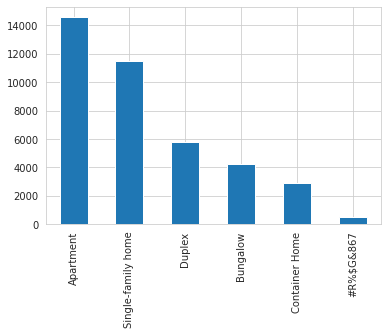

In [ ]:
df['Property_Type'].value_counts().plot(kind='bar')

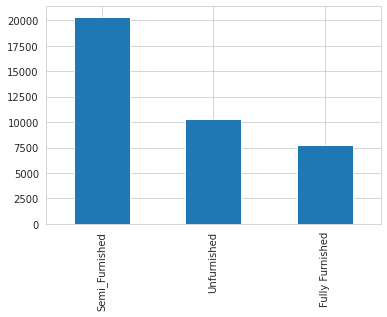

In [ ]:
df['Furnishing'].value_counts().plot(kind='bar')

In [ ]:
df['Frequency_of_Powercuts'].value_counts()

0.0    24471
1.0    10010
2.0     2441
3.0     1194
Name: Frequency_of_Powercuts, dtype: int64

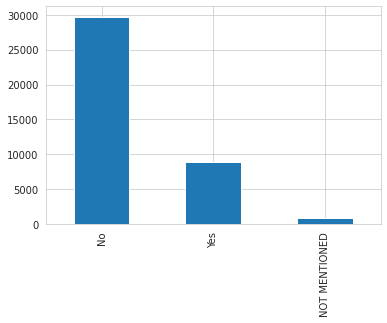

In [ ]:
df['Power_Backup'].value_counts().plot(kind='bar')

In [ ]:
df.Water_Supply.unique()

array(['Once in a day - Morning', 'Once in a day - Evening', 'All time',
       'NOT MENTIONED', 'Once in two days'], dtype=object)

In [ ]:
def Water_supply(inp):
  if inp == 'Once in a day - Morning':
    return 'Morning'
  elif inp == 'Once in a day - Evening':
    return 'Evening'
  elif inp == 'All time':
    return 'Avialable'
  elif inp == 'Once in two days':
    return 'Two'
  elif inp == 'NOT MENTIONED':
    return 'NA'
  else :
    return 0

In [ ]:
df['Water_Supply']=df['Water_Supply'].apply(Water_supply)

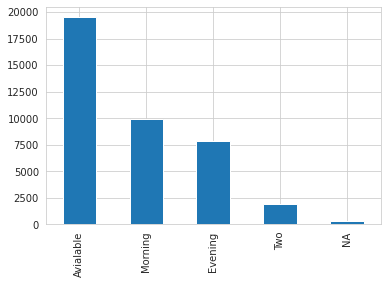

In [ ]:
df['Water_Supply'].value_counts().plot(kind='bar')

In [ ]:
print(f"\n maximum value for traffic density score {df['Traffic_Density_Score'].max()}")
print(f" \n minimum value for traffic density score {df['Traffic_Density_Score'].min()} ")


 maximum value for traffic density score 9.91
 
 minimum value for traffic density score 0.0 


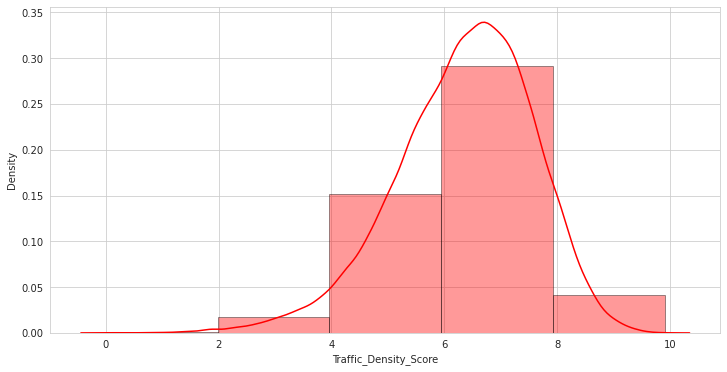

In [ ]:
f,ax = plt.subplots(figsize=(12,6))
ax=sns.distplot(df.Traffic_Density_Score,bins=5, kde=True , hist_kws={'edgecolor':'black'},color='red')

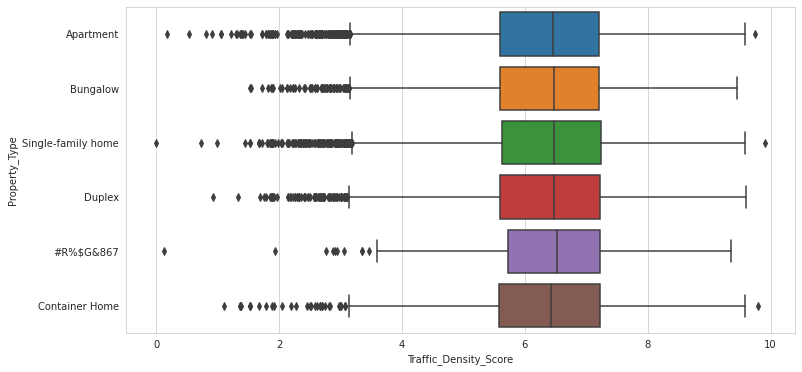

In [ ]:
f,ax = plt.subplots(figsize=(12,6))
sns.set_style('whitegrid')
ax = sns.boxplot(x=df.Traffic_Density_Score , y=df.Property_Type, data=df)

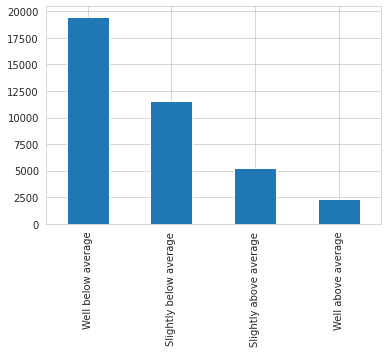

In [ ]:
df['Crime_Rate'].unique()
df['Crime_Rate'].value_counts().plot(kind='bar')

In [ ]:
def crime_rate(inp):
  if inp == 'Slightly below average':
    return 'SBB'
  elif inp == 'Well below average':
    return 'WBA'
  elif inp == 'Well above average':
    return 'WAA'
  elif inp == 'Slightly above average':
    return 'SAA'
  elif inp == 'nan':
    return 'NA'

In [ ]:
df['Crime_Rate']=df['Crime_Rate'].apply(crime_rate)

In [ ]:
cross_tab = pd.crosstab(index=df['Property_Type'], columns=df['Dust_and_Noise'], normalize="index")
cross_tab

Dust_and_Noise,High,Low,Medium
Property_Type,,,
#R%$G&867,0.083673,0.040816,0.875510
Apartment,0.081938,0.052130,0.865932
Bungalow,0.087728,0.055650,0.856622
Container Home,0.088098,0.058612,0.853290
Duplex,0.083881,0.056513,0.859605
Single-family home,0.083978,0.054365,0.861656


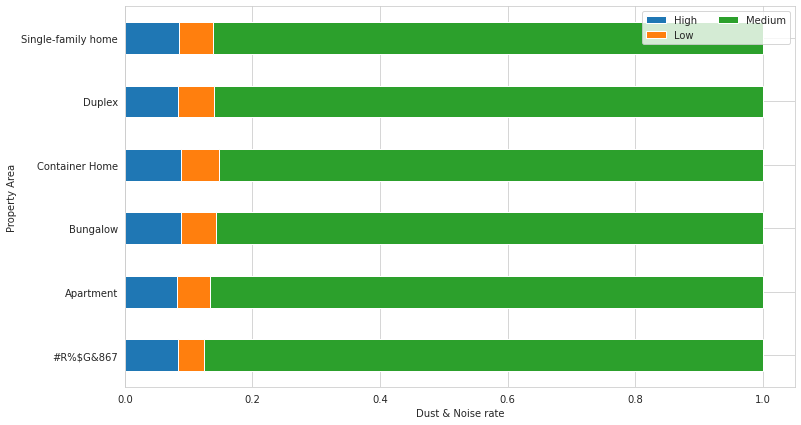

In [ ]:
cross_tab.plot(kind='barh',
                stacked=True,
               figsize=(12,7))
plt.legend(loc=' left',ncol=2)
plt.xlabel('Dust & Noise rate')
plt.ylabel('Property Area')
plt.show()

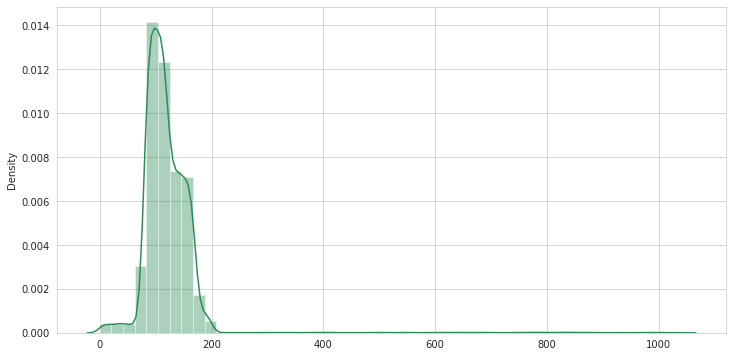

In [ ]:
f,ax = plt.subplots(figsize=(12,6))
ax=sns.distplot(x=df.Air_Quality_Index,kde=True,color='seagreen')

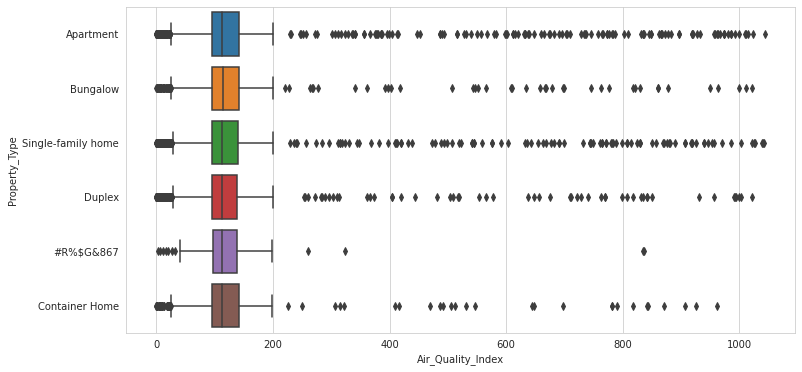

In [ ]:
f,ax = plt.subplots(figsize=(12,6))
sns.set_style('whitegrid')
ax=sns.boxplot(x=df.Air_Quality_Index , y=df.Property_Type , data=df)
ax

In [ ]:
df.describe()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score
count,39499.000000,37845.000000,39499.000000,38116.000000,39499.000000,39499.000000,39499.000000,39499.000000
mean,1391.715638,3.923768,2.331375,0.484678,6.354772,121.352566,3.735945,73.482297
std,1953.287544,2.690992,1.179964,0.752207,1.219681,62.384669,0.796843,14.118753
min,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.280000
25%,494.000000,2.000000,1.000000,0.000000,5.600000,95.000000,3.220000,69.660000
50%,932.000000,4.000000,2.000000,0.000000,6.470000,113.000000,3.850000,75.760000
75%,1770.000000,5.000000,3.000000,1.000000,7.220000,140.000000,4.260000,82.260000
max,28064.000000,15.000000,6.000000,3.000000,9.910000,1044.000000,5.000000,100.000000


In [ ]:
df.isnull().sum()

Property_ID                  0
Property_Type                0
Property_Area                0
Number_of_Windows         1654
Number_of_Doors              0
Furnishing                1042
Frequency_of_Powercuts    1383
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 787
Dust_and_Noise            1219
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64

In [ ]:
df.describe()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score
count,39499.000000,37845.000000,39499.000000,38116.000000,39499.000000,39499.000000,39499.000000,39499.000000
mean,1391.715638,3.923768,2.331375,0.484678,6.354772,121.352566,3.735945,73.482297
std,1953.287544,2.690992,1.179964,0.752207,1.219681,62.384669,0.796843,14.118753
min,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.280000
25%,494.000000,2.000000,1.000000,0.000000,5.600000,95.000000,3.220000,69.660000
50%,932.000000,4.000000,2.000000,0.000000,6.470000,113.000000,3.850000,75.760000
75%,1770.000000,5.000000,3.000000,1.000000,7.220000,140.000000,4.260000,82.260000
max,28064.000000,15.000000,6.000000,3.000000,9.910000,1044.000000,5.000000,100.000000


# Feature Engineering


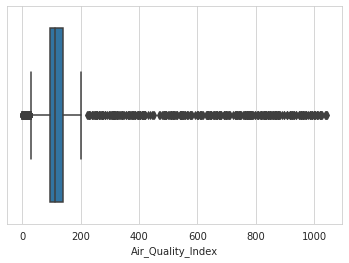

In [ ]:
ft=numerical_col = ['Property_Area','Number_of_Windows','Number_of_Doors','Frequency_of_Powercuts','Traffic_Density_Score','Air_Quality_Index','Neighborhood_Review']
categorical_col = ['Property_Type','Furnishing	','Water_Supply','Dust_and_Noise']
sns.boxplot(df['Air_Quality_Index'])

Outliers of Air quality index column 
 Upper Limit :  207.5
 Lower Limit :  27.5


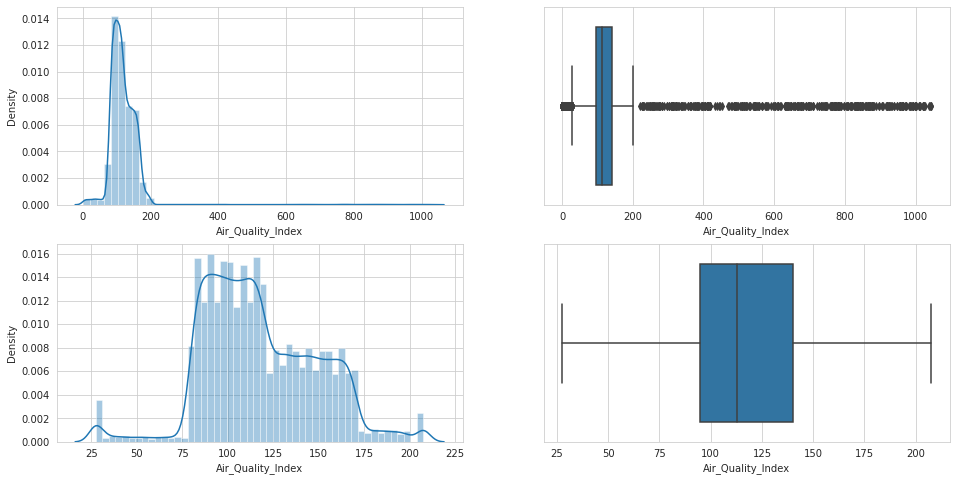

In [ ]:
#check outliers in Air quality index column 
print('Outliers of Air quality index column ')
old_df = df['Air_Quality_Index'].copy()
Q1 = np.quantile(df['Air_Quality_Index'],0.25)
Q3 = np.quantile(df['Air_Quality_Index'],0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(" Upper Limit : ", upper_limit)
print(" Lower Limit : ", lower_limit)
df['Air_Quality_Index'] = np.where(
    df['Air_Quality_Index'] > upper_limit,upper_limit,
    np.where(
        df['Air_Quality_Index'] < lower_limit,lower_limit,
        df['Air_Quality_Index']
    )
)
new_df = df['Air_Quality_Index'].copy()
# after IQR recheking of outliers: 

# comparing 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(old_df)

plt.subplot(2,2,2)
sns.boxplot(old_df)

plt.subplot(2,2,3)
sns.distplot(new_df)

plt.subplot(2,2,4)
sns.boxplot(new_df)

plt.show()

find outliers in Property Area
 Upper Limit :  3684.0
 Lower Limit :  -1420.0


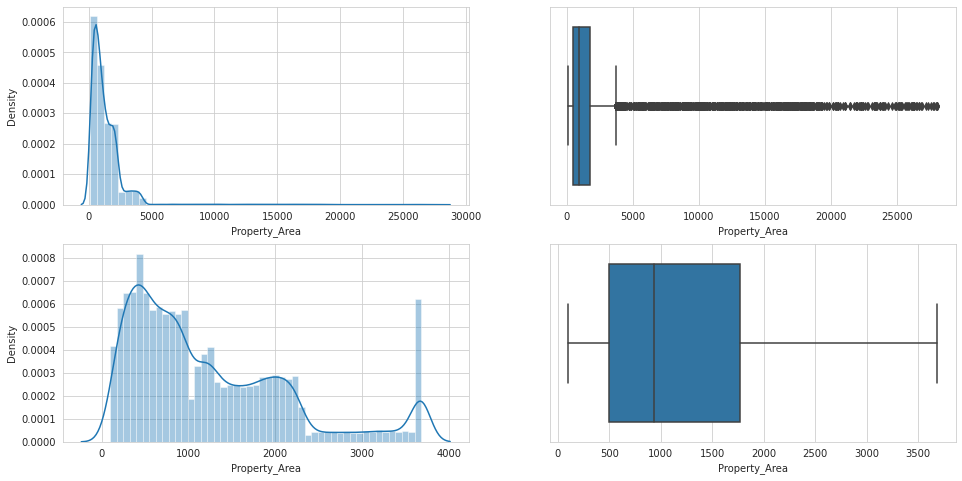

In [ ]:
#check outliers of Property Area column 
print('find outliers in Property Area')
df['Property_Area'].skew()
old_df = df['Property_Area'].copy()
Q1 = np.quantile(df['Property_Area'],0.25)
Q3 = np.quantile(df['Property_Area'],0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(" Upper Limit : ", upper_limit)
print(" Lower Limit : ", lower_limit)
df['Property_Area'] = np.where(
    df['Property_Area'] > upper_limit,upper_limit,
    np.where(
        df['Property_Area'] < lower_limit,lower_limit,
        df['Property_Area']
    )
)
new_df = df['Property_Area'].copy()
new_df
# after IQR recheking of outliers: 


# comparing 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(old_df)

plt.subplot(2,2,2)
sns.boxplot(old_df)

plt.subplot(2,2,3)
sns.distplot(new_df)

plt.subplot(2,2,4)
sns.boxplot(new_df)

plt.show()

find outliers in Habitability_score
 Upper Limit :  101.16000000000003
 Lower Limit :  50.759999999999984


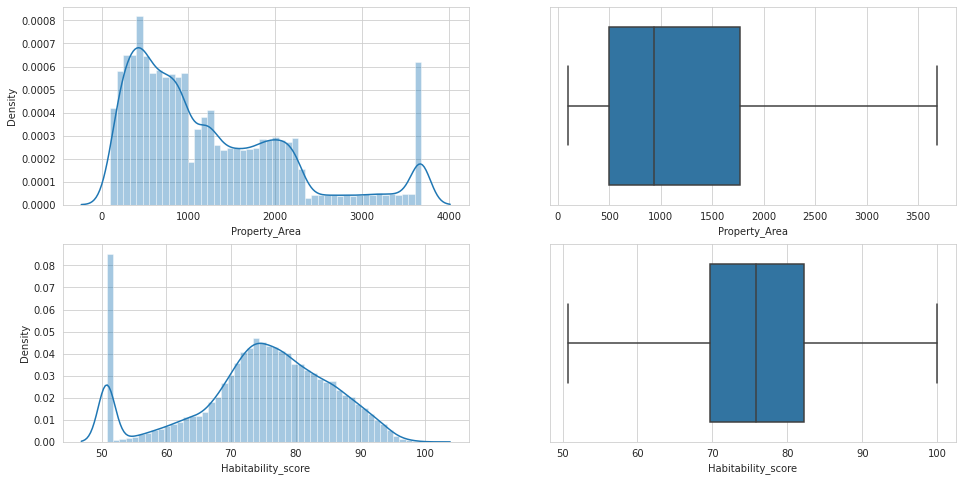

In [ ]:
#check outliers of Habitability Score column 
print('find outliers in Habitability_score')
df['Habitability_score'].skew()
old_df = df['Property_Area'].copy()
Q1 = np.quantile(df['Habitability_score'],0.25)
Q3 = np.quantile(df['Habitability_score'],0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(" Upper Limit : ", upper_limit)
print(" Lower Limit : ", lower_limit)
df['Habitability_score'] = np.where(
    df['Habitability_score'] > upper_limit,upper_limit,
    np.where(
        df['Habitability_score'] < lower_limit,lower_limit,
        df['Habitability_score']
    )
)
new_df = df['Habitability_score'].copy()
new_df
# after IQR recheking of outliers: 


# comparing 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(old_df)

plt.subplot(2,2,2)
sns.boxplot(old_df)

plt.subplot(2,2,3)
sns.distplot(new_df)

plt.subplot(2,2,4)
sns.boxplot(new_df)

plt.show()

find outliers in Neighbour Hood Score
 Upper Limit :  5.819999999999999
 Lower Limit :  1.6600000000000008


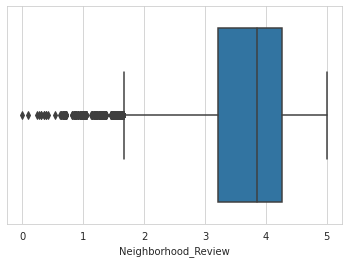

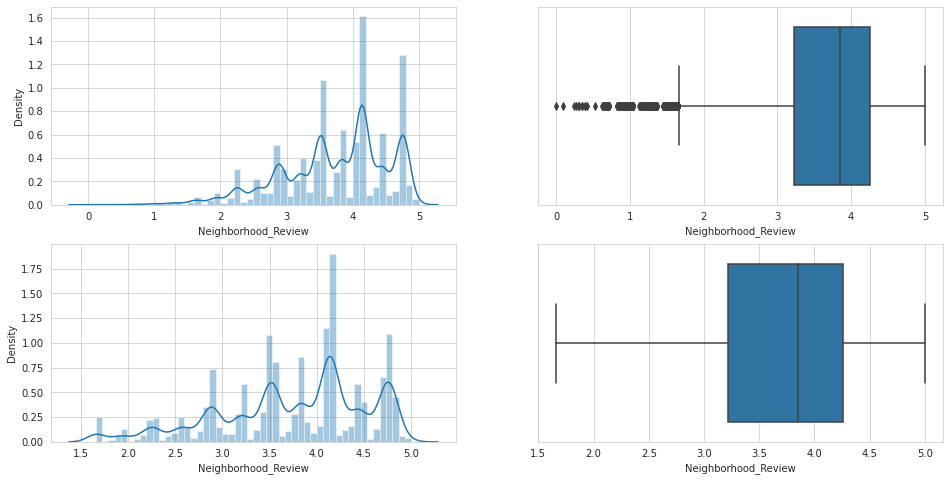

In [ ]:
#check outliers of Neighbourhood Score column 
print('find outliers in Neighbour Hood Score')
sns.boxplot(df['Neighborhood_Review'])
df['Neighborhood_Review'].skew()
old_df = df['Neighborhood_Review'].copy()
Q1 = np.quantile(df['Neighborhood_Review'],0.25)
Q3 = np.quantile(df['Neighborhood_Review'],0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(" Upper Limit : ", upper_limit)
print(" Lower Limit : ", lower_limit)
df['Neighborhood_Review'] = np.where(
    df['Neighborhood_Review'] > upper_limit,upper_limit,
    np.where(
        df['Neighborhood_Review'] < lower_limit,lower_limit,
        df['Neighborhood_Review']
    )
)
new_df = df['Neighborhood_Review'].copy()
new_df
# after IQR recheking of outliers: 


# comparing 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(old_df)

plt.subplot(2,2,2)
sns.boxplot(old_df)

plt.subplot(2,2,3)
sns.distplot(new_df)

plt.subplot(2,2,4)
sns.boxplot(new_df)

plt.show()

find outliers in Traffic_Density_Score Score
 Upper Limit :  9.65
 Lower Limit :  3.1699999999999995


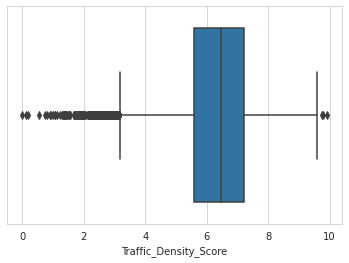

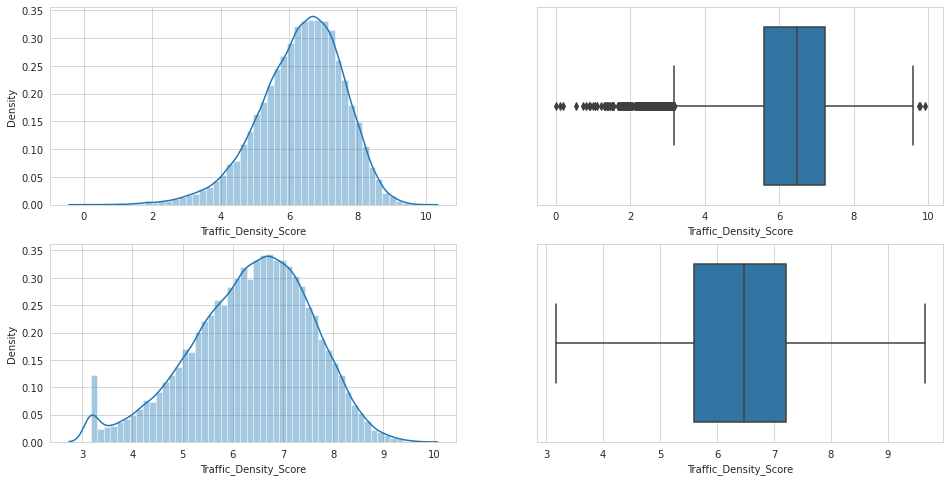

In [ ]:
#check outliers of Traffic Density Score column 
print('find outliers in Traffic_Density_Score Score')
sns.boxplot(df['Traffic_Density_Score'])
df['Traffic_Density_Score'].skew()
old_df = df['Traffic_Density_Score'].copy()
Q1 = np.quantile(df['Traffic_Density_Score'],0.25)
Q3 = np.quantile(df['Traffic_Density_Score'],0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(" Upper Limit : ", upper_limit)
print(" Lower Limit : ", lower_limit)
df['Traffic_Density_Score'] = np.where(
    df['Traffic_Density_Score'] > upper_limit,upper_limit,
    np.where(
        df['Traffic_Density_Score'] < lower_limit,lower_limit,
        df['Traffic_Density_Score']
    )
)
new_df = df['Traffic_Density_Score'].copy()
new_df
# after IQR recheking of outliers: 


# comparing 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(old_df)

plt.subplot(2,2,2)
sns.boxplot(old_df)

plt.subplot(2,2,3)
sns.distplot(new_df)

plt.subplot(2,2,4)
sns.boxplot(new_df)

plt.show()

In [ ]:
# important libraries for developing a pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.feature_selection import SelectKBest , chi2
from sklearn.linear_model import Lasso , LinearRegression
# import model metrics evalution
from sklearn.metrics import accuracy_score , mean_absolute_error , mean_squared_error , r2_score

In [ ]:
X= df.drop(['Habitability_score', 'Property_ID'],axis=1)
y= df['Habitability_score']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(f"shape of X values both train and test {X_train.shape , X_test.shape} ")
print(f"shape of y values both train and test {y_train.shape , y_test.shape} ")

shape of X values both train and test ((31599, 13), (7900, 13)) 
shape of y values both train and test ((31599,), (7900,)) 


In [ ]:
X_train.head()

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
5172,Bungalow,2677.0,9.0,2,Unfurnished,NaN,No,Evening,7.40,WBA,Medium,150.0,4.09
21982,Apartment,676.0,3.0,2,Semi_Furnished,1.0,No,Avialable,6.88,SBB,Medium,164.0,3.45
3353,Duplex,855.0,6.0,2,Unfurnished,1.0,No,Morning,6.01,WBA,Medium,139.0,3.80
13581,Container Home,365.0,3.0,1,Semi_Furnished,2.0,No,Two,6.96,WBA,Medium,98.0,2.59
7492,Apartment,481.0,3.0,2,Fully Furnished,2.0,Yes,Morning,5.14,SBB,Medium,86.0,2.62


In [ ]:
X_train.describe()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
count,31599.000000,30238.000000,31599.000000,30493.000000,31599.000000,31599.000000,31599.000000
mean,1223.216811,3.926020,2.332099,0.487194,6.362689,117.706130,3.739679
std,925.508229,2.688989,1.179945,0.753501,1.195944,31.401668,0.783349
min,100.000000,0.000000,1.000000,0.000000,3.170000,27.500000,1.660000
25%,494.000000,2.000000,1.000000,0.000000,5.600000,95.000000,3.220000
50%,931.000000,4.000000,2.000000,0.000000,6.470000,113.000000,3.850000
75%,1772.000000,5.000000,3.000000,1.000000,7.220000,140.000000,4.240000
max,3684.000000,15.000000,6.000000,3.000000,9.650000,207.500000,5.000000


In [ ]:
df.dtypes

Property_ID                object
Property_Type              object
Property_Area             float64
Number_of_Windows         float64
Number_of_Doors             int64
Furnishing                 object
Frequency_of_Powercuts    float64
Power_Backup               object
Water_Supply               object
Traffic_Density_Score     float64
Crime_Rate                 object
Dust_and_Noise             object
Air_Quality_Index         float64
Neighborhood_Review       float64
Habitability_score        float64
dtype: object

In [ ]:
# imputation Transformer
trf1 = ColumnTransformer([
    ('impute_number_of_windows', SimpleImputer(strategy='median'), [3]),
    ('impute_furnished', SimpleImputer(strategy='median'), [5]),
    ('impute_frequency_of_powercuts', SimpleImputer(strategy='most_frequent'), [6]),
    ('impute_crime_rate',SimpleImputer(strategy='most_frequent'),[10]),
    ('impute_dust_and_noise',SimpleImputer(strategy='most_frequent'),[11])
],remainder='passthrough')

In [ ]:
# one Hot Encoding
trf2 = ColumnTransformer([
    ('OHE_property_type_furnishing_powerBackup_waterSupply_crimeRate_dustandnoise', OneHotEncoder(sparse=False, handle_unknown='ignore'),[0,4,6,7,9,10])
], remainder='passthrough')

In [ ]:
# scaling
trf3 = ColumnTransformer([
    ('scale', MinMaxScaler(), slice(0,19))
])

In [ ]:
# feature slection
trf4 = SelectKBest(score_func=chi2,k=12)

In [ ]:
# train the model
lasso = Lasso(normalize=True)

# Pipeline for lasso regression


In [ ]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('lasso',lasso)
])
def model_evalution(pipe,X_train,X_test,y_train,y_test):
  model = pipe.fit(X_train , y_train)
  prediction = model.predict(X_test)
 #metrics------------/
  #mean Absoulute Error
  MAE = mean_absolute_error(prediction,y_test)
  # mean squared error
  MSE = mean_squared_error(prediction,y_test)
  # r2_Score
  r2 = r2_score(prediction,y_test)
  # Root mean sqauared error
  RMSE = np.sqrt(MSE)
  # Root Mean Squared Log Error 
  RMSLE = np.log(np.sqrt(MSE))

  #print all the metrics
  print(f" MAE: {MAE} ")
  print(f" MSE: {MSE} ")
  print(f" r2_Score : {r2} ")
  print('Root Mean Squared Error:')
  print(RMSE)
  print("Root Mean Squared Log Error :")
  print(RMSLE)




In [ ]:
model_evalution(pipe,X_train,X_test,y_train,y_test)

 MAE: 8.397714066820738 
 MSE: 118.13116660428308 
 r2_Score : 0.0 
Root Mean Squared Error:
10.868816246688647
Root Mean Squared Log Error :
2.385897794254373


# Linear Regression

In [ ]:
lr = LinearRegression()

In [ ]:
pipe_lr = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('Linear Regression',lr)
])

In [ ]:
model_evalution(pipe_lr,X_train,X_test,y_train,y_test)

 MAE: 8.385928955696205 
 MSE: 117.3670651412184 
 r2_Score : -122.54554318600047 
Root Mean Squared Error:
10.833608131237645
Root Mean Squared Log Error :
2.3826531663062696


In [ ]:
model = pipe_lr.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor()

In [ ]:
pipe_dt = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('DecesionTreeRegressor',dt)
])


In [ ]:
model_evalution(pipe_dt,X_train,X_test,y_train , y_test)

 MAE: 8.397197796419405 
 MSE: 117.62293579984768 
 r2_Score : -92.81208474485095 
Root Mean Squared Error:
10.845410817477026
Root Mean Squared Log Error :
2.383742024379914


# Random Forest Regressor 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RFR = RandomForestRegressor()

In [ ]:
pipe_rfr = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('RandomForestRegressor',RFR)
])


In [ ]:
model_evalution(pipe_rfr,X_train,X_test,y_train , y_test)

 MAE: 8.394446985524887 
 MSE: 117.55688849685771 
 r2_Score : -100.31160642408071 
Root Mean Squared Error:
10.842365447486896
Root Mean Squared Log Error :
2.383461186918946


# Stochastic Gradient descendent

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd = SGDRegressor()

In [ ]:
pipe_sgd = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('Stochastic Gradient Descedent',sgd)
])

In [ ]:
model_evalution(pipe_sgd,X_train,X_test,y_train , y_test)

 MAE: 8.377444193878627 
 MSE: 117.39040269809807 
 r2_Score : -136.1409279172684 
Root Mean Squared Error:
10.834685168388516
Root Mean Squared Log Error :
2.3827525776569343


In [ ]:
model = pipe_sgd.fit(X_train,y_train)
y_pred_sgd = model.predict(X_test)

Text(0.5, 1.0, 'Scatter plot from Actual y to predicted y ')

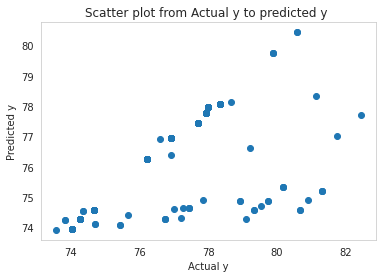

In [ ]:
plt.scatter(y_pred,y_pred_sgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from Actual y to predicted y ')

# KNN Regressor


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor()

In [ ]:
pipe_knn = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('Kn Regressor',knn)
])

In [ ]:
model_evalution(pipe_knn,X_train,X_test,y_train , y_test)

 MAE: 10.3247817721519 
 MSE: 168.62365106936716 
 r2_Score : -2.110980950962693 
Root Mean Squared Error:
12.985516973511958
Root Mean Squared Log Error :
2.563834657453646


# Support Vector Machine

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR()

In [ ]:
pipe_svr = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('Support Vector Machine Regressor',svr)
])

In [ ]:
model_evalution(pipe_svr,X_train,X_test,y_train , y_test)

 MAE: 8.332945551748757 
 MSE: 118.33242093832904 
 r2_Score : -243.51494676244138 
Root Mean Squared Error:
10.878070644113736
Root Mean Squared Log Error :
2.3867488951986315


# Extra Tree Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
etr =  ExtraTreesRegressor()

In [ ]:
pipe_etr = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('Extra Tree  Regressor',etr)
])

In [ ]:
model_evalution(pipe_etr,X_train,X_test,y_train , y_test)

 MAE: 8.397197796419412 
 MSE: 117.6229357998477 
 r2_Score : -92.81208474485004 
Root Mean Squared Error:
10.845410817477026
Root Mean Squared Log Error :
2.383742024379914


# XGB Boost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_r = XGBRegressor()

In [ ]:
pipe_xgb_r = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    (' XGBRegressor',xgb_r)
])

In [ ]:
model_evalution(pipe_etr,X_train,X_test,y_train , y_test)

 MAE: 8.397197796419412 
 MSE: 117.6229357998477 
 r2_Score : -92.8120847448494 
Root Mean Squared Error:
10.845410817477026
Root Mean Squared Log Error :
2.383742024379914


# ADABoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada = AdaBoostRegressor(loss='square')

In [ ]:
pipe_ada = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    (' AdaBoostRegressor',ada)
])

In [ ]:
model_evalution(pipe_ada,X_train,X_test,y_train , y_test)

 MAE: 9.284500680761209 
 MSE: 130.226606406543 
 r2_Score : -288.29191324161394 
Root Mean Squared Error:
11.411687272552776
Root Mean Squared Log Error :
2.434638029589231


# Vooting Regressor

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=10)

vt = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

In [ ]:
pipe_vt = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    (' Vooting Regressor',vt)
])

In [ ]:
model_evalution(pipe_vt,X_train,X_test,y_train , y_test)

[21:06:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 MAE: 8.393236911743658 
 MSE: 117.53894710649894 
 r2_Score : -102.50790913980056 
Root Mean Squared Error:
10.841538041555678
Root Mean Squared Log Error :
2.383384871699038


# Gradient Boosting

In [ ]:
gb = GradientBoostingRegressor()

In [ ]:
pipe_gb = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    (' Gradient Boosting Regressor',gb)
])

In [ ]:
model_evalution(pipe_gb,X_train,X_test,y_train , y_test)

 MAE: 8.390553179237179 
 MSE: 117.4922149268237 
 r2_Score : -108.2001857639234 
Root Mean Squared Error:
10.839382589743002
Root Mean Squared Log Error :
2.383186037723633
